# Pymaceuticals Inc.

--Brief analysis--

After cleaning and merging the data we can see from the charts that they show the following
* The bar graph Drug Regimen shows that Capomulin has the highest count of mice used with Propriva beng the drug used with the least amount of mice.
* The pie charts show that there is almost an equal number of male to female mice.
* There is a correlation of 0.84 between mouse weight and average tumor volume. The positive correlation suggests that as the mouse weight increases so does the tumor weight.
* The boxplot shows that the drugs Capomulin and Ramicane have a lowest mean regarding tumor volume suggesting these are the better of the drugs.


In [1]:
# Import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Add the study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the files from the 'mouse data' and the 'study results'
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
# And display the data table for a preview
pymaceuticles_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
pymaceuticles_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Check the number of mice
mice_count = pymaceuticles_df["Mouse ID"].unique()
total_mice_count=len(mice_count)
total_mice_count

249

In [4]:
# Get the duplicate mice by ID number that shows for Mouse ID and Timepoint. 
dup_mice_id = pymaceuticles_df.loc[pymaceuticles_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice_id

array(['g989'], dtype=object)

In [5]:
# Get all the data for the duplicate mouse ID.
dup_mice_id_df = pymaceuticles_df.loc[pymaceuticles_df["Mouse ID"] == "g989", :]
dup_mice_id_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = pymaceuticles_df[pymaceuticles_df["Mouse ID"].isin(dup_mice_id)==False]
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mice_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_mice_df['Tumor Volume (mm3)'].groupby(clean_mice_df['Drug Regimen']).mean()
median = clean_mice_df['Tumor Volume (mm3)'].groupby(clean_mice_df['Drug Regimen']).median()
variance = clean_mice_df['Tumor Volume (mm3)'].groupby(clean_mice_df['Drug Regimen']).var()
std_dev = clean_mice_df['Tumor Volume (mm3)'].groupby(clean_mice_df['Drug Regimen']).std()
s_e_m = clean_mice_df['Tumor Volume (mm3)'].groupby(clean_mice_df['Drug Regimen']).sem()

summary_pymaceuticles_stats = pd.DataFrame({"Tumor Volume:Mean": mean,
                                        "Tumor Volume:Median": median,
                                        "Tumor Volume:Variance": variance,
                                        "Tumor Volume:Standard Deviation": std_dev,
                                        "Tumor Volume:SEM": s_e_m})

summary_pymaceuticles_stats


,Tumor Volume:Mean,Tumor Volume:Median,Tumor Volume:Variance,Tumor Volume:Standard Deviation,Tumor Volume:SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg =  clean_mice_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
#Create a group series (use 'drug regimen' column) counting the number of data points for each
mice_counts = clean_mice_df["Drug Regimen"].value_counts()
mice_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

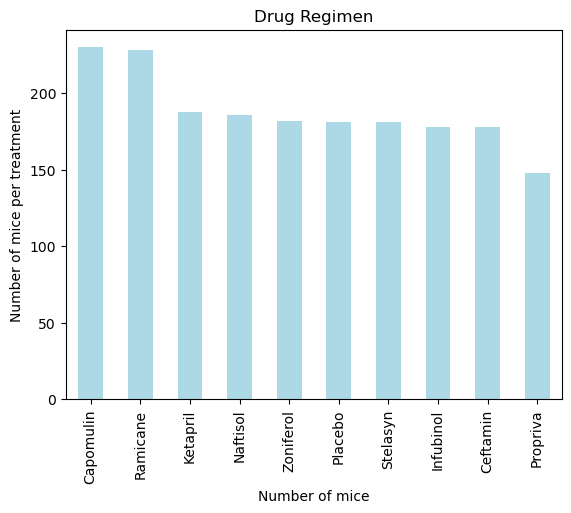

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot_pandas = mice_counts.plot.bar(color="lightblue")
#Set the axis and labels and titles
plt.title("Drug Regimen")
plt.xlabel("Number of mice")
plt.ylabel("Number of mice per treatment")
plt.show()


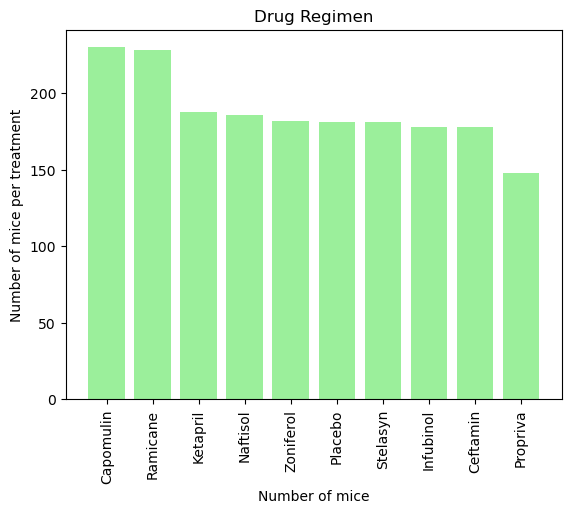

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_counts.index.values
y_axis = mice_counts.values

plt.bar(x_axis, y_axis, color='lightgreen', alpha=0.9, align='center')
plt.title("Drug Regimen")
plt.xlabel("Number of mice")
plt.ylabel("Number of mice per treatment")
plt.xticks(rotation="vertical")

plt.show()


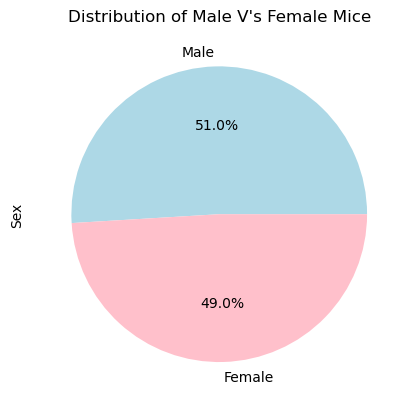

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_on_gender = clean_mice_df["Sex"].value_counts()
colors = ["lightblue", "pink"]
plt.title("Distribution male vs. female mice")
data_on_gender.plot.pie(colors = colors, autopct= "%1.1f%%")

plt.title("Distribution of Male V's Female Mice")
plt.ylabel("Sex")
plt.show()


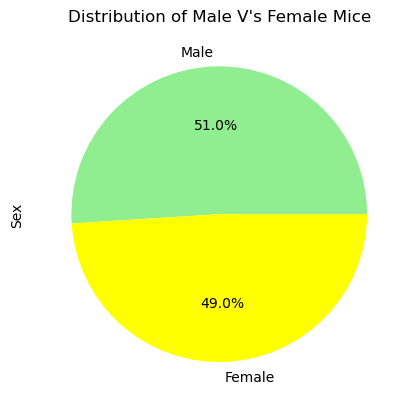

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
size = [51, 49]
colors = "lightgreen", "yellow"
plt.pie(size, labels=labels, colors=colors,autopct="%1.1f%%")

plt.title("Distribution of Male V's Female Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin", :]


In [18]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

#Campulin
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
low_q = quartiles[0.25]
upp_q = quartiles[0.75]
i_q_r = upp_q-low_q


print(f"Capomulin tumors - lower quartile: {low_q}")
print(f"Capomulin tumors - upper quartile: {upp_q}")
print(f"Capomulin tumors - interquartile range: {i_q_r}")
print(f"Capomulin tumors - the median: {quartiles[0.5]} ")

low_bound = low_q - (1.5*i_q_r)
upp_bound = upp_q + (1.5*i_q_r)

print(f" The values below {low_bound} could be outliers.")
print(f" The values above {upp_bound} could be outliers.")
    

Capomulin tumors - lower quartile: 32.37735684
Capomulin tumors - upper quartile: 40.1592203
Capomulin tumors - interquartile range: 7.781863460000004
Capomulin tumors - the median: 38.1251644 
 The values below 20.70456164999999 could be outliers.
 The values above 51.83201549 could be outliers.


In [23]:
#ramicane
#the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()
ramicane_merge.to_csv("output.csv")
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ramicane_tumors.quantile([.25,.5,.75])
low_q = quartiles[0.25]
upp_q = quartiles[0.75]
i_q_r = upp_q-low_q


print(f"Ramicane tumors - lower quartile: {low_q}")
print(f"Ramicane tumors - upper quartile: {upp_q}")
print(f"Ramicane tumors - interquartile range: {i_q_r}")
print(f"Ramicane tumors - the median: {quartiles[0.5]} ")

low_bound = low_q - (1.5*i_q_r)
upp_bound = upp_q + (1.5*i_q_r)

print(f" The values below {low_bound} could be outliers.")
print(f" The values above {upp_bound} could be outliers.")

Ramicane tumors - lower quartile: 31.56046955
Ramicane tumors - upper quartile: 40.65900627
Ramicane tumors - interquartile range: 9.098536719999998
Ramicane tumors - the median: 36.56165229 
 The values below 17.912664470000003 could be outliers.
 The values above 54.30681135 could be outliers.


In [24]:
#infubinol
#the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [26]:
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles =infubinol_tumors.quantile([.25,.5,.75])
low_q = quartiles[0.25]
upp_q = quartiles[0.75]
i_q_r = upp_q-low_q


print(f"Infubinol tumors - lower quartile: {low_q}")
print(f"Infubinol tumors - upper quartile: {upp_q}")
print(f"Infubinol tumors - interquartile range: {i_q_r}")
print(f"Infubinol tumors - the median: {quartiles[0.5]} ")

low_bound = low_q - (1.5*i_q_r)
upp_bound = upp_q + (1.5*i_q_r)

print(f" The values below {low_bound} could be outliers.")
print(f" The values above {upp_bound} could be outliers.")

#infubinol_merge.to_csv("output.csv")

Infubinol tumors - lower quartile: 54.04860769
Infubinol tumors - upper quartile: 65.52574285
Infubinol tumors - interquartile range: 11.477135160000003
Infubinol tumors - the median: 60.16518046 
 The values below 36.83290494999999 could be outliers.
 The values above 82.74144559000001 could be outliers.


In [27]:
#ceftamin
#the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [28]:
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
low_q = quartiles[0.25]
upp_q = quartiles[0.75]
i_q_r = upp_q-low_q

print(f"Ceftamin tumors - lower quartile: {low_q}")
print(f"Ceftamin tumors - upper quartile: {upp_q}")
print(f"Ceftamin tumors - interquartile range: {i_q_r}")
print(f"Ceftamin tumors - the median: {quartiles[0.5]} ")

low_bound = low_q - (1.5*i_q_r)
upp_bound = upp_q + (1.5*i_q_r)

print(f" The values below {low_bound} could be outliers.")
print(f" The values above {upp_bound} could be outliers.")

Ceftamin tumors - lower quartile: 48.72207785
Ceftamin tumors - upper quartile: 64.29983003
Ceftamin tumors - interquartile range: 15.577752179999997
Ceftamin tumors - the median: 59.85195552 
 The values below 25.355449580000002 could be outliers.
 The values above 87.66645829999999 could be outliers.


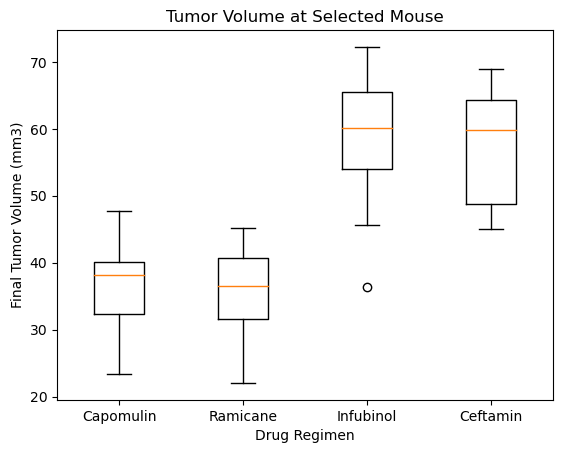

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_plot, labels=regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

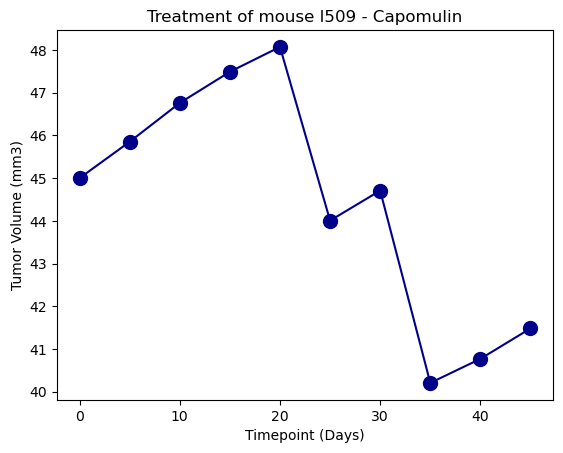

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
size = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Treatment of mouse l509 - Capomulin')
plt.plot(x_axis, size,linewidth=1.5, markersize=10, marker="o",color="darkblue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

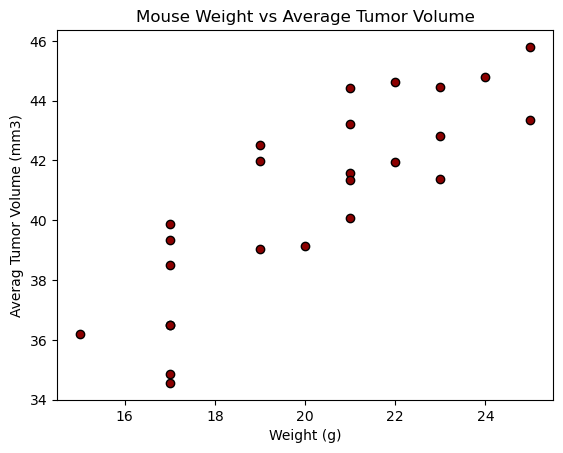

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=12
plt.scatter(avg_capm['Weight (g)'],avg_capm['Tumor Volume (mm3)'], color="darkred", edgecolor="black")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm['Weight (g)'],avg_capm['Tumor Volume (mm3)'])
print(f"{round(correlation[0],2)} - correlation between mouse weight and average tumor volume")


0.84 - correlation between mouse weight and average tumor volume


Text(20, 37, 'y = 0.95x + 21.55')

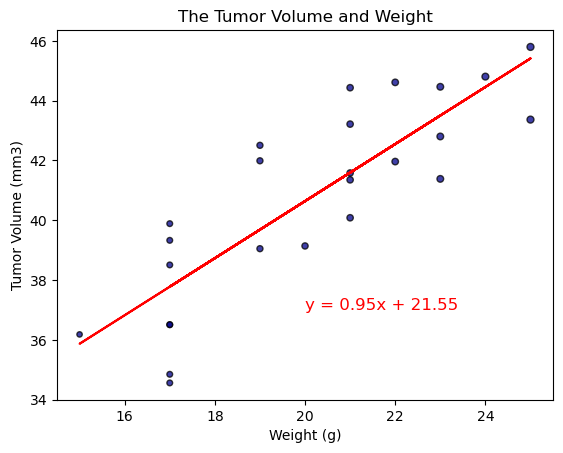

In [62]:
#set x and y
x_values = avg_capm["Weight (g)"]
y_values = avg_capm["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x_values, y_values, marker="o", facecolors="darkblue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("The Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")